# DATA STANDARDS FOR THIS DATASET

DATA STANDARDS
1. NAME: All the Names in the name column should be in proper case
2. AGE: Age should be in int data type
3. GENDER: Gender should be in proper case
4. BLOOD TYPE: Leave the Blood type Column as it is
5. MEDICAL CONDITION: Leave the Medical Conditions should be in proper case.
6. DATE OF ADMISSION: Date of Admission should be in datetime format
7. DOCTOR: The doctor’s name should be in proper case and there should be Dr. in front of all the doctors' names.
8. HOSPITAL: Each hospital Name should be in proper case and multiple hospitals are allowed for each patient.
9. INSURANCE PROVIDER: Each insurance provider name should be in proper case
10. ROOM NUMBER: The room number column should be in int data type
11. ADMISSION TYPE: Admission Type should be in proper case
12. DATE OF DISCHARGE: Date of discharge should be in datetime format
13. MEDICATION: The names of each medication should be in proper case
14. TEST RESULTS: The values of the test results column should be in proper case.


# IMPORTING LIBRARIES AND LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import charset_normalizer
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process

# ENSURING THAT THERE IS NO ENCODING ISSUES AND LOADING THE DATA

healthData = pd.read_csv('healthcare_dataset.csv')

sampleData = healthData.sample(n = 3000)

sampleData.to_csv('healthcare_dataset(utf-8).csv', encoding = 'utf-8', index = False)

In [6]:
healthData = pd.read_csv('healthcare_dataset(Dirty).csv', encoding = 'utf-8')
healthData.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,lyNn FeRnANdEZ,24,Female,AB+,Hypertension,2023-12-01,Shannon David,Richardson-Bryant,UnitedHealthcare,39004.169781,127,Urgent,2023-12-08,Aspirin,Normal
1,BRITTAnY steWarT,51,Male,AB-,Obesity,2019-12-28,Richard Rodriguez,Nunez-Leon,Aetna,42272.454522,477,Urgent,2020-01-23,Aspirin,Inconclusive
2,STepHaNiE pARKeR,42,Male,AB+,Cancer,2021-03-09,Kerri Santiago,Roberts-Gonzalez,Cigna,14198.831475,179,Elective,2021-04-04,Paracetamol,Inconclusive
3,roBErT sPeNCE,54,Female,A+,Obesity,2023-04-27,Stacy Love,Vincent LLC,Aetna,38028.088189,252,Elective,2023-05-03,Lipitor,Abnormal
4,WILLiaM GLEnn,81,Male,B-,Cancer,2023-11-18,Paul Key,Andrews PLC,Aetna,21768.337386,326,Emergency,2023-11-21,Penicillin,Inconclusive


# CHECKING OUT ALL THE COLUMNS IN THE DATASET

# CHECKING OUT THE MISSING VALUES AND DATA TYPES OF THIS DATASET

In [7]:
healthData.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
healthData.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [9]:
healthData.shape

(3000, 15)

Conclusion:
1. This Dataset has no null values.

# CHECKING OUT THE NAME COLUMN

In [10]:
print(healthData['Name'].value_counts().sort_index())

AArON sTrICkLanD     1
AAroN MArtiN         1
ADaM taylOR          1
ALBErt bROokS        1
ALEXANdra OlSEn      1
                    ..
zAchaRy WaNg         1
zaCHARY rodrigueZ    1
zaCHAry balL         1
zacHary ThompSoN     1
zachArY paRrISh      1
Name: Name, Length: 2987, dtype: int64


CONCLUSION:
1. Some of the data are duplicates. I'll need to see other columns to know what to do about them(Determine which one to delete).
2. Ther are lots of Capitalization issues 
3. I don't think there are inconsistencies in the spelling of same names
4. I don't think there is a trailing white space issue

# CHECKING OUT AGE COLUMN

In [11]:
print(healthData['Age'].value_counts())

53    55
68    55
18    54
25    53
51    53
      ..
78    32
15     5
88     3
86     3
17     3
Name: Age, Length: 72, dtype: int64


CONCLUSION:
1. I don't think this column has inconsistencies.

# CHECKING OUT THE GENDER COLUMN

In [12]:
print(healthData['Gender'].value_counts())

Female    1511
Male      1489
Name: Gender, dtype: int64


CONCLUSION:
1. I don't think this column has any inconsistencies

# CHECKING OUT THE BLOODTYPE COLUMN

In [13]:
print(healthData['Blood Type'].value_counts())

B+     393
AB+    387
A+     385
AB-    384
B-     368
O-     367
A-     365
O+     351
Name: Blood Type, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column

# CHECKING OUT INCONSISTENCIES IN MEDICAL CONDITION COLUMN

In [14]:
print(healthData['Medical Condition'].value_counts())

Diabetes        520
Arthritis       506
Hypertension    504
Asthma          501
Cancer          491
Obesity         478
Name: Medical Condition, dtype: int64


CONCLUSION:
1. I don't think that there is any issues or inconsistencies with this column

# CHECKING OUT THE INCONSISTENCIES IN DATE OF ADMISSION COLUMN

In [15]:
print(healthData['Date of Admission'].str.len().value_counts())

10    3000
Name: Date of Admission, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column.
2. The data is not in date format so we must change it to datetime in order to properly utilize it.

# CHECKING OUT INCONSISTENCIES IN THE DOCTOR COLUMN

In [16]:
print(healthData['Doctor'].value_counts().sort_index())

Aaron Collins       1
Aaron Davila        1
Aaron Hernandez     1
Aaron Hill          1
Aaron Jones         1
                   ..
Zachary Lopez       1
Zachary Osborne     1
Zachary Sanchez     1
Zachary Thompson    1
Zachary Walter      1
Name: Doctor, Length: 2944, dtype: int64


CONCLUSION:
1. I don't think there is any duplicate in this column
2. I want all the names to have the Dr. title at the beginning
4. Find out the meaning of extra titles of doctor and check if it matches the diseases the patients are suffering.

# CHECKING OUT THE HOSPITAL COLUMN

In [17]:
print(healthData['Hospital'].value_counts().sort_index())

Abbott-Jones                     1
Acevedo Ltd                      1
Acevedo Phillips Steele, and     1
Acosta, Miller Martin and        1
Adams Ltd                        1
                                ..
and Wilson Miller Wagner,        1
and Wilson Swanson, Griffin      1
and Wood, Ryan Lopez             1
and Woodard Martin Wells,        1
and Woods, Rodriguez Williams    1
Name: Hospital, Length: 2867, dtype: int64


CONCLUSION:
1. Some hospital names are two. Try find out why from data description
2. Multiple hospital names are arranged the wrong way. Put it the right way and use & as a connector
3. Hospital names are arranged wrongly. Business suffixes like, ltd, llc, Inc, plc e.t.c should come last. Gather a list of all business suffixes and look for them in the data, then arrange properly
4. Lots of corporation names are arranged inconsistently, but i can find the consistent way by looking up its other arrangements in the column

# CHECKING OUT INCONSISTENCIES IN THE INSURANCE PROVIDER COLUMN

In [18]:
print(healthData['Insurance Provider'].value_counts())

Aetna               623
Blue Cross          622
Medicare            590
Cigna               589
UnitedHealthcare    576
Name: Insurance Provider, dtype: int64


CONCLUSION:
1. I don't think there are any inconsistencies in this column

# CHECKING OUT INCONSISTENCIES IN THE BILLING AMOUNT

CONCLUSION:
1. i don't think that there is  any inconsistencies in this column but as a preventive measure. I might be okay to compare the variation of prices charged for the same diseases. It shouldn't varry too much

# CHECKING OUT INCONSISTENCIES IN THE ROOM NUMBER COLUMN

In [19]:
print(healthData['Room Number'].value_counts())

458    16
120    15
244    15
394    14
243    14
       ..
281     2
423     2
118     2
234     2
349     1
Name: Room Number, Length: 400, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column but you might want to compare the room numbers in each hospital and also the addmission and discharge time to make sure that no patient was admitted into a room where there is already another patient.
2. Or it might be because the rooms are wards with multiple patients

# CHECKING OUT INCONSISTENCIES IN THE ADMISSION TYPE COLUMN

In [20]:
print(healthData['Admission Type'].value_counts())

Elective     1031
Urgent       1003
Emergency     966
Name: Admission Type, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column

# CHECKING OUT INCONSISTENCIES IN THE DISCHARGE DATE COLUMN

In [21]:
print(healthData['Discharge Date'].str.len().value_counts())

10    3000
Name: Discharge Date, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column

# CHECKING OUT INCONSISTENCIES IN THE MEDICATION COLUMN

In [22]:
print(healthData['Medication'].value_counts())

Aspirin        632
Paracetamol    607
Ibuprofen      607
Penicillin     591
Lipitor        563
Name: Medication, dtype: int64


CONCLUSION:
1. I don't think there is any inconsistencies in this column

# CHECKING OUT INCONSISTENCIES IN THE TEST RESULT COLUMN

In [23]:
print(healthData['Test Results'].value_counts())

Abnormal        1018
Inconclusive     998
Normal           984
Name: Test Results, dtype: int64


CONCLUSION:
1. I don't think think there is any inconsistencies in this column

# CLEANING INCONSISTENCIES IN THE DATASET AND CONVERTING DATE TO DATETIME

# CLEANING THE NAME COLUMN

In [24]:
healthData['Name'] = healthData['Name'].str.title()

# CHANGING THE DATE OF ADMISSION TO DATETIME

In [25]:
healthData['Date of Admission'] = pd.to_datetime(healthData['Date of Admission'], format="%Y-%m-%d")

In [26]:
display(healthData['Date of Admission'])

0      2023-12-01
1      2019-12-28
2      2021-03-09
3      2023-04-27
4      2023-11-18
          ...    
2995   2022-09-10
2996   2022-12-18
2997   2023-05-26
2998   2021-12-13
2999   2022-03-17
Name: Date of Admission, Length: 3000, dtype: datetime64[ns]

In [27]:
Day = healthData['Date of Admission'].dt.day

<AxesSubplot:xlabel='Date of Admission', ylabel='Count'>

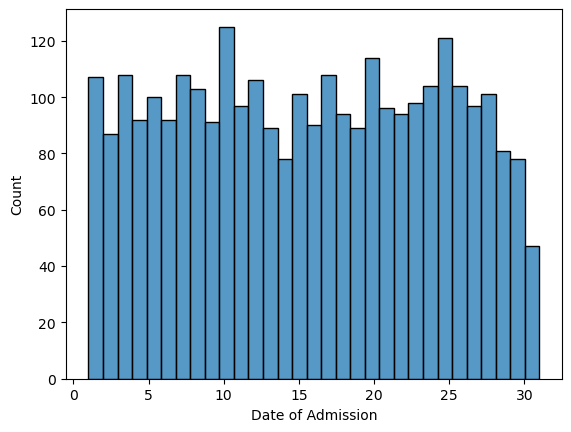

In [28]:
# Checking if the date conversion was done properly
sns.histplot(Day, kde = False, bins = 31)

# CLEANING THE DOCTOR COLUMN

In [29]:
healthData['Doctor'] = healthData['Doctor'].str.strip()

In [30]:
def titleAdder(doc):
    if doc.find('Dr.'):
        return "Dr. " + doc
    else:
        return doc
healthData['Doctor'] = healthData['Doctor'].apply(titleAdder)

# CLEANING THE HOSPITAL COLUMN

In [31]:
# Checking out the cause of errors with fuzzywuzzy
print(fuzzywuzzy.process.extract("Kane", healthData['Hospital'], scorer = fuzzywuzzy.fuzz.ratio, limit=20))

[('Khan-Fisher', 53, 1483), ('Inc Khan', 50, 2533), ('Payne Inc', 46, 555), ('Kline Ltd', 46, 604), ('Beck-Wade', 46, 954), ('Cook-Chan', 46, 2920), ('Parker-Gardner', 44, 2711), ('Nolan-Pena', 43, 78), ('Daniel LLC', 43, 176), ('Evans-Lowe', 43, 521), ('King-Green', 43, 595), ('Wagner LLC', 43, 626), ('Lane-Kelly', 43, 838), ('Rangel Inc', 43, 961), ('Yang-Lopez', 43, 1084), ('Ltd Garner', 43, 1553), ('Ltd Daniel', 43, 1616), ('Daniel Ltd', 43, 1714), ('Malone-Lee', 43, 1735), ('Banks-West', 43, 1744)]


In [32]:
def arranger(hospital):
    if len(hospital.split(' ')) == 4 and 'and' in hospital.split(' '):
        listing = hospital.split(' ')
        for i in listing:
            if ',' in i:
                pos = listing.index(i)
                listing.insert(0, listing.pop(pos))
        if listing[1] == 'and':
            listing.insert(2, listing.pop(1))
        elif listing[3] == 'and':
            listing.insert(2, listing.pop(3))
        hos0 = list(listing[0])
        hos1 = list(listing[1])
        hos3 = list(listing[3])
        hos0.insert(-1, ' Hospital')
        hos1.insert(len(hos1), ' Hospital')
        hos3.insert(len(hos3), ' Hospital')
        hos0 = ''.join(hos0)
        hos1 = ''.join(hos1)
        hos3 = ''.join(hos3)
        listing.pop(0)
        listing.insert(0, hos0)
        listing.pop(1)
        listing.insert(1, hos1)
        listing.pop(3)
        listing.insert(3, hos3)
        return ' '.join(listing)
    else:
        return hospital
healthData['Hospital'] = healthData['Hospital'].apply(arranger)

In [33]:
# Arranging two words
def arranger2(hospital):
    if len(hospital.split(' ')) == 3 and 'and' in hospital.split(' '):
        listing = hospital.split(' ')
        if listing[0] == 'and':
            listing.insert(1, listing.pop(0))
        elif listing[2] == 'and':
            listing.insert(1, listing.pop(2))
        listing.insert(3, 'Hospital')
        return ' '.join(listing)
    else:
        return hospital
healthData['Hospital'] = healthData['Hospital'].apply(arranger2)

In [34]:
def arranger3(hospital):
    if len(hospital.split(' ')) == 2 and 'LLC' in hospital.split(' '):
        listing = hospital.split(' ')
        if listing[0] == 'LLC':
            listing.insert(1, listing.pop(0))
        listing.insert(1, 'Hospital')
        return ' '.join(listing)
    elif len(hospital.split(' ')) == 2 and 'Ltd' in hospital.split(' '):
        listing = hospital.split(' ')
        if listing[0] == 'Ltd':
            listing.insert(1, listing.pop(0))
        listing.insert(1, 'Hospital')
        return ' '.join(listing)
    elif len(hospital.split(' ')) == 2 and 'Inc' in hospital.split(' '):
        listing = hospital.split(' ')
        if listing[0] == 'Inc':
            listing.insert(1, listing.pop(0))
        listing.insert(1, 'Hospital')
        return ' '.join(listing)
    elif len(hospital.split(' ')) == 2 and 'PLC' in hospital.split(' '):
        listing = hospital.split(' ')
        if listing[0] == 'PLC':
            listing.insert(1, listing.pop(0))
        listing.insert(1, 'Hospital')
        return ' '.join(listing)
    else:
        return hospital
healthData['Hospital'] = healthData['Hospital'].apply(arranger3)

In [35]:
# Arranging two words
def arranger4(hospital):
    if 'Hospital' in hospital.split(' '):
        return hospital
    else:
        return hospital + ' Hospital'
healthData['Hospital'] = healthData['Hospital'].apply(arranger4)

In [36]:
healthData['Hospital'] = healthData['Hospital'].str.title()

In [37]:
display(healthData['Hospital'].value_counts().sort_index())

Abbott-Jones Hospital                                   1
Acevedo Hospital Ltd                                    1
Acosta Hospital Inc                                     1
Acosta Hospital, Miller Hospital And Martin Hospital    1
Adams And Sons Hospital                                 1
                                                       ..
Zamora Hospital Ltd                                     2
Zimmerman Hospital Ltd                                  1
Zimmerman-Carson Hospital                               1
Zuniga Hospital, Berry Hospital And Wilson Hospital     1
Zuniga-Lopez Hospital                                   1
Name: Hospital, Length: 2804, dtype: int64

# CHANGING THE DATE OF DISCHARGE COLUMN TO DATETIME

In [38]:
healthData['Discharge Date'] = pd.to_datetime(healthData['Discharge Date'], format="%Y-%m-%d")

In [39]:
display(healthData['Discharge Date'])

0      2023-12-08
1      2020-01-23
2      2021-04-04
3      2023-05-03
4      2023-11-21
          ...    
2995   2022-09-21
2996   2022-12-24
2997   2023-06-25
2998   2021-12-23
2999   2022-03-26
Name: Discharge Date, Length: 3000, dtype: datetime64[ns]

<AxesSubplot:xlabel='Discharge Date', ylabel='Count'>

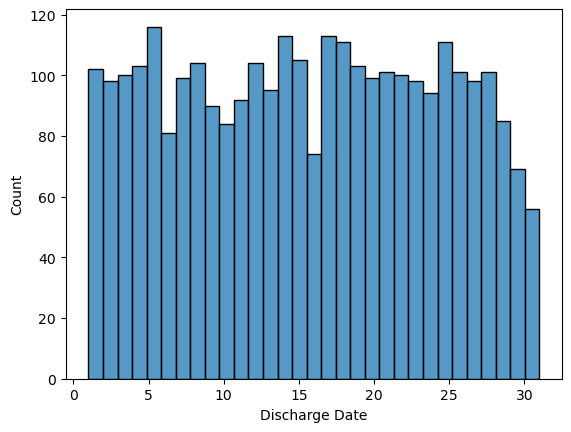

In [40]:
# Making sure that the dates and months are parsed correctly
Day = healthData['Discharge Date'].dt.day
sns.histplot(Day, kde = False, bins = 31)

# DROPPING DUPLICATES IN THE DATASET

In [41]:
Duplicates = healthData[healthData.duplicated(subset = 'Name', keep = False)]

In [43]:
Duplicates.sort_values(by='Name').head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
2968,Alicia Parker,51,Male,B-,Diabetes,2020-01-30,Dr. Michael Bullock,"Ware Hospital, Wagner Hospital And Davis Hospital",Aetna,31036.129369,487,Emergency,2020-02-13,Paracetamol,Normal
939,Alicia Parker,85,Female,A-,Diabetes,2022-12-06,Dr. Christopher Lawrence,Miller-Suarez Hospital,Medicare,41007.678083,309,Elective,2023-01-03,Lipitor,Inconclusive
973,Andrew Johnson,30,Female,O-,Hypertension,2023-01-15,Dr. Kyle Brown,Patel-Hanna Hospital,Medicare,40623.262036,163,Emergency,2023-01-30,Lipitor,Abnormal
723,Andrew Johnson,23,Female,A+,Cancer,2022-02-26,Dr. David Edwards,"Lopez Hospital, Klein Hospital And Johnson Hos...",Aetna,15192.489567,388,Emergency,2022-03-15,Ibuprofen,Abnormal
1499,Angela Garcia,52,Female,A-,Obesity,2022-06-25,Dr. Cynthia Martinez,Jenkins-Fernandez Hospital,Blue Cross,26680.487180,244,Elective,2022-07-24,Aspirin,Abnormal


In [44]:
print(len(Duplicates))

145


In [45]:
healthData = healthData.drop(healthData[healthData.duplicated(subset = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results'], keep = 'first')].index)

In [46]:
print(len(healthData))

2987


# SAVING THE CLEANED DATASET

In [50]:
# Displaying the datasset after all cleaning has been done
healthData.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Lynn Fernandez,24,Female,AB+,Hypertension,2023-12-01,Dr. Shannon David,Richardson-Bryant Hospital,UnitedHealthcare,39004.169781,127,Urgent,2023-12-08,Aspirin,Normal
1,Brittany Stewart,51,Male,AB-,Obesity,2019-12-28,Dr. Richard Rodriguez,Nunez-Leon Hospital,Aetna,42272.454522,477,Urgent,2020-01-23,Aspirin,Inconclusive
2,Stephanie Parker,42,Male,AB+,Cancer,2021-03-09,Dr. Kerri Santiago,Roberts-Gonzalez Hospital,Cigna,14198.831475,179,Elective,2021-04-04,Paracetamol,Inconclusive
3,Robert Spence,54,Female,A+,Obesity,2023-04-27,Dr. Stacy Love,Vincent Hospital Llc,Aetna,38028.088189,252,Elective,2023-05-03,Lipitor,Abnormal
4,William Glenn,81,Male,B-,Cancer,2023-11-18,Dr. Paul Key,Andrews Hospital Plc,Aetna,21768.337386,326,Emergency,2023-11-21,Penicillin,Inconclusive


In [51]:
healthData.to_csv('healthcare_dataset(Cleaned).csv', encoding = 'utf-8', index = False)